## Dogrusal Olmayan Regresyon Modelleri

### 1. K- En Yakin Komsu(KNN)
- Tahminler gozlem benzerligine gore yapilir
- Bana arkadasini soyle sana kim oldugunu soyleyeyim

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

# hata mesaji almamak icin 
from warnings import filterwarnings
filterwarnings('ignore')

### KNN

In [6]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [7]:
knn_model = KNeighborsRegressor().fit(X_train, y_train)

In [8]:
knn_model

KNeighborsRegressor()

In [9]:
# kommsuluk sayisi
knn_model.n_neighbors

5

#### KNN Tahmin

In [11]:
 y_pred = knn_model.predict(X_test)

In [12]:
np.sqrt(mean_squared_error(y_test, y_pred))

426.6570764525201

In [13]:
# dogrulanmamis hata hesaplamak.
RMSE = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    RMSE.append(rmse)
    print("k = ", k, "icin RMSE degeri:", rmse)

k =  1 icin RMSE degeri: 0.0
k =  2 icin RMSE degeri: 179.52761335480352
k =  3 icin RMSE degeri: 205.20157172291863
k =  4 icin RMSE degeri: 220.5139794876305
k =  5 icin RMSE degeri: 239.6467132541376
k =  6 icin RMSE degeri: 243.5904190007242
k =  7 icin RMSE degeri: 258.1478781634636
k =  8 icin RMSE degeri: 266.05374203349805
k =  9 icin RMSE degeri: 269.73782093553376
k =  10 icin RMSE degeri: 271.2798300436963


#### KNN Model Tuning

In [15]:
from sklearn.model_selection import GridSearchCV

##### GridSearchCV
 - GridSearchCV, sklearn kütüphanesinin bir parçası olan ve makine öğrenmesi modellerinin hiperparametrelerini optimize etmek için kullanılan bir araçtır.
 - Model ve Hiperparametreleri Belirleme: Hangi modelin ve hangi hiperparametrelerin deneneceğini belirleyin.
- GridSearchCV Nesnesi Oluşturma: GridSearchCV nesnesi, model ve hiperparametreler ile oluşturulur.
- Modeli Eğitme: fit metodu ile eğitim verisi üzerinde modeli eğitir ve en iyi hiperparametreleri bulur.
- Sonuçları İnceleme: En iyi model ve performans metriklerini inceleyebilirsiniz. 

In [17]:
knn_params = {'n_neighbors': np.arange(1, 30, 1)}
np.arange(1, 30, 1)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [18]:
knn = KNeighborsRegressor()

In [19]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10)

In [20]:
# burda modeli egitik ve aslinda burda parametreleri deneyip ve uygun olan 
# parametreyi bulmus oldu
knn_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [21]:
knn_cv_model.best_params_["n_neighbors"]

8

In [22]:
# cross validation edilmis hata hesaplamak..
RMSE = []
RMSE_CV = []
for k in range(10):
    k = k+1
    knn_model = KNeighborsRegressor(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_train)
    rmse = np.sqrt(mean_squared_error(y_train, y_pred))
    rmse_cv = np.sqrt(-1*cross_val_score(knn_model, 
                                     X_train,
                                     y_train,
                                     cv = 10,
                                     scoring = "neg_mean_squared_error")).mean()

    RMSE.append(rmse)
    RMSE_CV.append(rmse_cv)
    print("k = ", k, "icin RMSE degeri: ", rmse, "RMSE_CV degeri: ", rmse_cv)

k =  1 icin RMSE degeri:  0.0 RMSE_CV degeri:  314.00484847632146
k =  2 icin RMSE degeri:  179.52761335480352 RMSE_CV degeri:  286.3603325067769
k =  3 icin RMSE degeri:  205.20157172291863 RMSE_CV degeri:  273.9931666607254
k =  4 icin RMSE degeri:  220.5139794876305 RMSE_CV degeri:  275.7180399577597
k =  5 icin RMSE degeri:  239.6467132541376 RMSE_CV degeri:  278.63565154224034
k =  6 icin RMSE degeri:  243.5904190007242 RMSE_CV degeri:  284.4231965885963
k =  7 icin RMSE degeri:  258.1478781634636 RMSE_CV degeri:  280.0247076065351
k =  8 icin RMSE degeri:  266.05374203349805 RMSE_CV degeri:  276.2836061510732
k =  9 icin RMSE degeri:  269.73782093553376 RMSE_CV degeri:  280.327057055243
k =  10 icin RMSE degeri:  271.2798300436963 RMSE_CV degeri:  287.23959512744636


In [23]:
knn_tuned = KNeighborsRegressor(n_neighbors = knn_cv_model.best_params_["n_neighbors"])

In [24]:
knn_tuned.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [25]:
np.sqrt(mean_squared_error(y_test, knn_tuned.predict(X_test)))

413.7094731463598

### Destek Vektor Regresyonu(SVR)
- amac, bir marjin araliginda maximum noktayi en kucuk hata ile alabilecek sekilde dogruyu  ya da egriyi belirlemektir.

In [27]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [28]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])


In [29]:
from sklearn.svm import SVR

In [30]:
svr_model = SVR(kernel = "linear").fit(X_train, y_train)

In [31]:
y_pred = svr_model.predict(X_test)[0:5]

In [32]:
# svr'in model denklemi
print ("y = {0} + {1} x".format(svr_model.intercept_[0], 
                                svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [33]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [34]:
-48.6975609756151 + 4.969512195122093 * 91

403.52804878049534

In [35]:
y_pred = svr_model.predict(X_test)

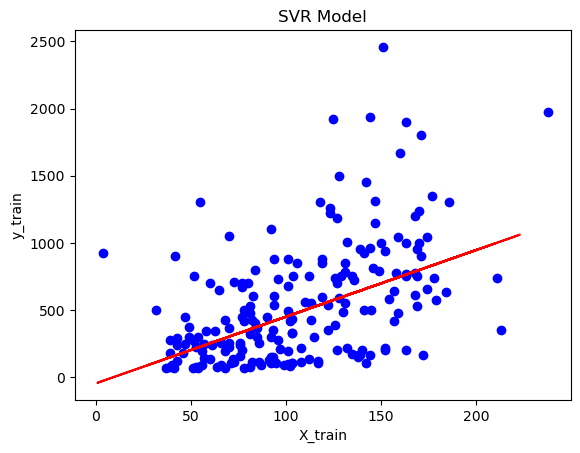

In [36]:
plt.scatter(X_train, y_train, color="blue")  

# Modelin tahmin ettiği değerleri çizdirin
plt.plot(X_test, y_pred, color="red")  

# Grafik başlıkları ve etiketleri
plt.xlabel('X_train') 
plt.ylabel('y_train')  
plt.title('SVR Model') 
plt.show()


In [37]:
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred = lm_model.predict(X_train)
print("y = {1} + {1} x".format(lm_model.intercept_,lm_model.coef_[0]))

y = 5.1724561354706875 + 5.1724561354706875 x


In [38]:
- 5.1724561354706875  + 5.1724561354706875  * 91

465.5210521923619

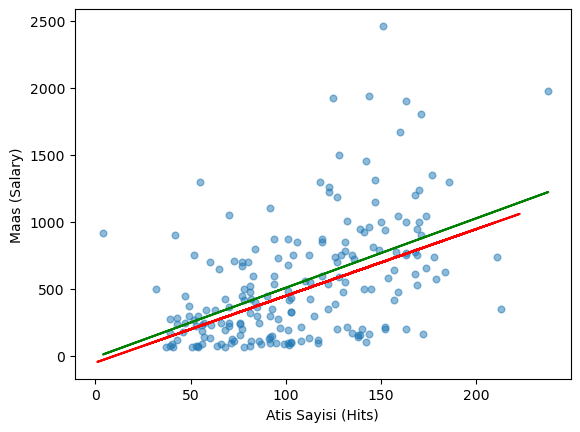

In [39]:


plt.scatter(X_train["Hits"], y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'green')
plt.plot(X_test, y_pred, color = 'r')

# Etiketler ve başlık ekleyin
plt.xlabel("Atis Sayisi (Hits)")
plt.ylabel("Maas (Salary)");

#### Tahmin

In [41]:
print("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0]))

y = -48.69756097561513 + 4.969512195122093 x


In [42]:
svr_model.predict([[91]])

array([403.52804878])

In [43]:
y_pred = svr_model.predict(X_test)

In [44]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

# Modeli eğitin
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)
# Test verileri üzerinde tahmin yapın
y_pred = svr_model.predict(X_test)

In [45]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)


RMSE: 459.0187960365147


In [46]:
svr_model

SVR(kernel='linear')

#### SVR-Model Tuning

In [48]:
# Modelinizi yeniden eğitin ve tahmin yapın
# C = ceza parametresi
svr_params = {"C": np.arange(0.1, 2, 0.1)}
svr_cv_model = GridSearchCV(SVR(kernel="linear"), svr_params, cv=10).fit(X_train, y_train)
best_C = svr_cv_model.best_params_['C']

In [49]:
pd.Series(svr_cv_model.best_params_)[0]

0.1

In [50]:
svr_tuned = SVR(kernel="linear", C=best_C).fit(X_train, y_train)

In [51]:
y_pred = svr_tuned.predict(X_test)

In [52]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

458.198966781116


In [53]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

### Dogrusal Olamayan SVR

In [55]:
np.random.seed(3)

x_sim = np.random.uniform(2, 10, 145)
y_sim = np.sin(x_sim) + np.random.normal(0, 0.4, 145)

# aykiri gozlem
x_outliers = np.arange(2.5, 5, 0.5)
y_outliers = -5*np.ones(5)

x_sim_idx = np.argsort(np.concatenate([x_sim, x_outliers]))
x_sim = np.concatenate([x_sim, x_outliers])[x_sim_idx]
y_sim = np.concatenate([y_sim, y_outliers])[x_sim_idx]

- ##### Radial Basis Function (RBF): En yaygın kullanılan çekirdek fonksiyonlardan biridir. Özellikle veri noktalarının merkezi bir noktaya olan uzaklığına dayalı olarak çalışır. RBF, doğrusal olmayan ilişkileri yakalamada oldukça etkilidir.

In [57]:
from sklearn.linear_model import LinearRegression
ols = LinearRegression()
ols.fit(np.sin(x_sim[:, np.newaxis]), y_sim)
ols_pred = ols.predict(np.sin(x_sim[:, np.newaxis]))

from sklearn.svm import SVR
eps = 0.1
svr = SVR(kernel ='rbf', epsilon = eps)
svr.fit(x_sim[:, np.newaxis], y_sim)
svr_pred = svr.predict(x_sim[:, np.newaxis])


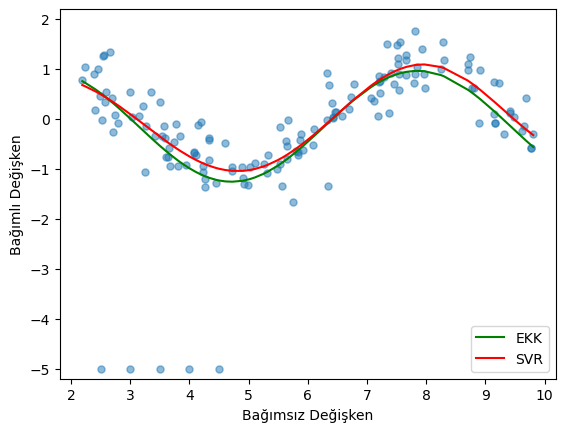

In [58]:
plt.scatter(x_sim, y_sim, alpha=0.5, s=26)
plt_ols, = plt.plot(x_sim, ols_pred, color="green")
plt_svr, = plt.plot(x_sim, svr_pred, color="red")

ax = plt.gca()  # Mevcut ekseni alın
ax.set_xlabel("Bağımsız Değişken")
ax.set_ylabel("Bağımlı Değişken")

plt.ylim(-5.2, 2.2)
plt.legend([plt_ols, plt_svr], ['EKK', 'SVR'], loc=4)


In [59]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [60]:
# rbf = Radial Basis Function
# svr modelin kurduk.
svr_rbf = SVR(kernel = "rbf").fit(X_train, y_train)

#### Dogrusal Olamayan-SVR Tahmin

In [62]:
y_pred = svr_rbf.predict(X_test)

In [63]:
np.sqrt(mean_squared_error(y_test, y_pred))

460.0032657244849

#### Dogrusal Olamayan-SVR Model Tuning

In [65]:
svr_rbf

SVR()

In [66]:
svr_params = {"C" : [0.1, 0.4, 10, 20, 30, 40, 50]}
svr_cv_model = GridSearchCV(svr_rbf, svr_params, cv = 10)
svr_cv_model.fit(X_train, y_train)
best_C = svr_cv_model.best_params_['C']

In [67]:
best_C

50

In [68]:
pd.Series(svr_cv_model.best_params_)[0]

50

In [69]:
svr_tuned = SVR(kernel = "rbf", C = best_C).fit(X_train, y_train)

In [70]:
y_pred = svr_tuned.predict(X_test) # Tahmin islemi 
np.sqrt(mean_squared_error(y_test, y_pred))

428.00406888095694

### Yapay Sinir Ağları
- İnsan beyninin bilgi işleme şeklini referans alan sınıflandırma ve regresyon problemleri için kullanılabilen kuvvetli makine öğrenmesi algoritmalarından birisidir.

![Neuron Icon](https://f6publishing.blob.core.windows.net/7081838e-248b-4977-910c-623688b2b217/WJCC-8-3971-g001.png) <!-- İcon için ek bir görsel varsa buraya eklenebilir -->


 ##### Multilayer Perceptron (MLP)
* giriş katmanı (input layer), bir veya daha fazla gizli katman (hidden layers), ve çıkış katmanından (output layer) oluşur. Her katmandaki her nöron, önceki katmandaki tüm nöronlarla bağlantılıdır ve bu bağlantılar, sinir ağının öğrenme sürecinde ayarladığı ağırlıklarla birlikte gelir. MLP'ler, sınıflandırma ve regresyon problemleri de dahil olmak üzere birçok makine öğrenmesi görevinde yaygın olarak kullanılır.

#### ANN Model

In [74]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [75]:
from sklearn.preprocessing import StandardScaler

In [76]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [77]:
X_train_scaled = scaler.transform(X_train)

In [78]:
X_test_scaled = scaler.transform(X_test)

In [79]:
from sklearn.neural_network import MLPRegressor

In [80]:
# Multilayer Perceptron
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 20)).fit(X_train_scaled, y_train)

In [81]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [82]:
# katman sayisi (input, hidden, output)
mlp_model.n_layers_

4

In [83]:
# gizli katman icindeki eleman sayisini verdi 
mlp_model.hidden_layer_sizes

(100, 20)

#### Yapay sinir aglari (ANN) Tahmin

In [85]:
mlp_model.predict(X_train_scaled)[0:5]

array([ 73.96049415, 327.2578743 , 188.55209214,  79.33803726,
        57.96735616])

In [86]:
y_pred = mlp_model.predict(X_test_scaled)

In [87]:
np.sqrt(mean_squared_error(y_test, y_pred))

493.40139233252154

#### ANN Model Tuning

In [89]:
mlp_model

MLPRegressor(hidden_layer_sizes=(100, 20))

In [90]:
mlp_params = {'alpha' : [0.1, 0.01, 0.02, 0.005],
             'hidden_layer_sizes' : [(20,20), (100,50,150), (300,200,150)],
              'activation' : ['relu', 'logistic']}

In [91]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)

In [92]:
mlp_cv_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=MLPRegressor(hidden_layer_sizes=(100, 20)),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005],
                         'hidden_layer_sizes': [(20, 20), (100, 50, 150),
                                                (300, 200, 150)]})

In [93]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (100, 50, 150)}

In [94]:
mlp_tuned = MLPRegressor(alpha = 0.02, hidden_layer_sizes = (100,50,150))

In [95]:
mlp_tuned.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.02, hidden_layer_sizes=(100, 50, 150))

In [96]:
y_pred = mlp_tuned.predict(X_test_scaled)

In [97]:
np.sqrt(mean_squared_error(y_test, y_pred))

361.77739022461884

### Classification and Regression Trees (CART)
* Amac veri seti icersindeki karmasik yapilari basit karar yapilarina donusturmektir.
 Heterojen veri setleri belirlenmis bir hedef degiskene gore homojen alt gruplara ayrilir.

                                            Breiman 1984

In [99]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [100]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [101]:
# max_leaf_nodes dallanma kontrolu saglayan bir parametre
cart_model = DecisionTreeRegressor(max_leaf_nodes=10)

In [102]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

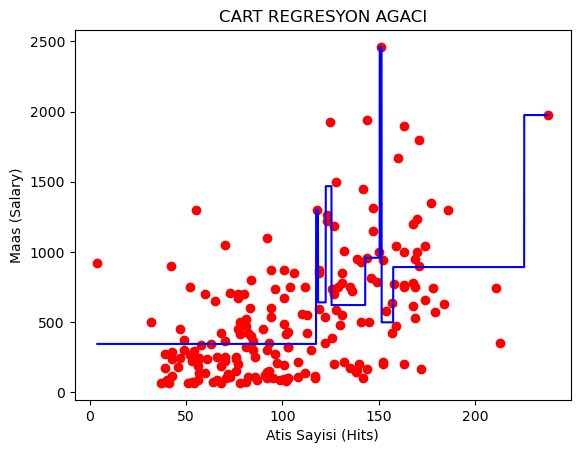

In [103]:
# grid izgara
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
X_grid = X_grid.reshape((len(X_grid)), 1)
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')
plt.title("CART REGRESYON AGACI")
plt.xlabel("Atis Sayisi (Hits)")
plt.ylabel("Maas (Salary)");

In [104]:
pip install skompiler

Note: you may need to restart the kernel to use updated packages.


In [105]:
from skompiler import skompile

In [106]:
pip install astor

Note: you may need to restart the kernel to use updated packages.


 -astor modülü, Python abstract syntax tree'lerini (AST) kaynak koda dönüştürmek için kullanılır. 

In [108]:
print(skompile(cart_model.predict).to('python/code'))

(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)



### CART Tahmin

In [110]:
x = [91]

In [111]:
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

345.2011551724138

In [112]:
cart_model.predict(X_test)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [113]:
cart_model.predict([[91]])

array([345.20115517])

In [114]:
y_pred = cart_model.predict(X_test)

In [115]:
np.sqrt(mean_squared_error(y_test, y_pred))

486.34593105235456

### CART Model tuning

In [117]:
# min_samples_split = 
cart_model = DecisionTreeRegressor( min_samples_split=2)
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [118]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

In [119]:
cart_params = {'min_samples_split':range(2,100),
          'max_leaf_nodes':range(2,10)}

In [120]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [121]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [122]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 76}

In [123]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=37)

In [124]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=37)

In [125]:
y_pred = cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

434.2326688144208

### Bagged Trees
- **Bagging:** Temeli bootstrap yontemi ile olusturulan birden fazla karar agacinin urettigi tehminlerin bir araya getirilerek degerlendirilmesine dayanir.

In [127]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [128]:
# bootstrap_features=True bootstrap orneklemlerini gozlemlemek icin  argumani True yapiyoruz
bag_model = BaggingRegressor(bootstrap_features=True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [129]:
bag_model.n_estimators

10

In [130]:
# burda bize bir birinden farkli 10 adet fit edilmi agac verecek
bag_model.estimators_

[DecisionTreeRegressor(random_state=1875850171),
 DecisionTreeRegressor(random_state=1686320658),
 DecisionTreeRegressor(random_state=2106270115),
 DecisionTreeRegressor(random_state=604160287),
 DecisionTreeRegressor(random_state=1818112300),
 DecisionTreeRegressor(random_state=1144551074),
 DecisionTreeRegressor(random_state=1634764234),
 DecisionTreeRegressor(random_state=820974251),
 DecisionTreeRegressor(random_state=1387516839),
 DecisionTreeRegressor(random_state=2009973545)]

In [131]:
# her bir agacta kac tane ornek oldugu bilgisine ulasmak istersek
bag_model.estimators_samples_

[array([120, 102, 141,  16,  82,  35, 147,  84,   6, 161, 141, 164, 178,
        119,  59,  89,  83, 116, 180,  74, 128,  70,  48,  73, 157, 173,
         67,  89, 127, 108, 110, 162,  39, 151,  81,  52, 171,  40, 152,
        129,  56, 100, 129, 125,  53, 101, 140, 101, 114,  26,   4,  19,
         59,   1, 195, 132, 162,  79, 176,  97,  79, 165, 132, 163,  62,
        147, 170,  92,  29,  44,   7, 195, 188,  52,  93, 183, 138, 175,
         99,  40,  90,  45, 195,  20,  62,  86, 135, 115,  95,   7,  59,
        123, 143, 171, 120,  72,  75, 183, 190,  64,  56,  83, 174,  94,
        166, 132,  12,  25, 113, 185, 187,   8,  14,  70,  21,  36, 101,
         30,  96, 112,   1, 138, 149,  46,  46,  78,  22, 109,  93, 140,
         33,  70, 179,  38,  35,  85,  75,  11, 153, 151,  76,  39, 136,
         99,  28, 108,  54, 179,  83,  32,   0, 130, 142, 194, 140,  38,
         51,   6,  44,  70,  15, 174,  23, 125, 100,  90,  50, 139,  32,
        107,  51, 143, 179, 185,  50,  27, 115, 175

In [132]:
# agacin bagimsiz degiskenlerine ulasmak istersek
bag_model.estimators_features_

[array([ 1,  3, 15, 11,  8,  1,  0, 14,  2, 17,  6,  7, 15, 17, 17,  1,  3,
        13, 14]),
 array([18, 16,  6,  7, 10,  8,  3, 11,  2,  1, 11,  8,  6,  4,  1, 14, 16,
        15, 18]),
 array([ 3, 14,  7, 11,  0, 18,  4,  8, 12,  4, 14, 14,  4, 14, 13,  4,  4,
         6, 15]),
 array([ 4, 15, 16,  9, 11, 18,  5, 14,  6, 17,  3, 12,  2,  5,  2,  4,  0,
         9, 14]),
 array([12,  9,  7, 13, 18, 11, 13,  0,  4, 13, 10,  1,  8, 17, 14, 13, 13,
        13, 11]),
 array([ 2, 15,  3, 14,  2,  5,  5, 12, 15, 18,  1,  1, 18,  8, 12,  7,  0,
        18,  3]),
 array([10, 18,  2,  1,  8, 17,  1, 14, 15, 13, 13,  0, 15, 13, 13, 14, 15,
        18,  1]),
 array([11, 16,  7,  6, 17,  9, 14,  4,  9,  9,  2,  5, 17,  3, 10, 11,  6,
        11,  8]),
 array([ 7,  7, 17,  2,  7,  5, 10, 13,  9,  5, 16, 18, 17,  8, 13, 16, 12,
         6, 12]),
 array([ 9,  0, 12,  8,  0, 16,  0,  3,  5, 15, 17, 10,  2,  9,  5,  0, 11,
        14,  7])]

In [133]:
# her bir modele ozel degerler eriselim
bag_model.estimators_[0]

DecisionTreeRegressor(random_state=1875850171)

#### Tahmin

In [135]:
y_pred = bag_model.predict(X_test)

In [136]:
np.sqrt(mean_squared_error(y_test, y_pred))

329.4424429776916

In [137]:
iki_y_pred = bag_model.estimators_[1].fit(X_train, y_train).predict(X_test)

In [138]:
 # bu agacin degeri cok dusuk geldi becereksiz agac 
np.sqrt(mean_squared_error(y_test, iki_y_pred))

530.8569840261865

In [139]:
yedi_y_pred = bag_model.estimators_[4].fit(X_train, y_train).predict(X_test)

In [140]:
np.sqrt(mean_squared_error(y_test, yedi_y_pred))

440.43887842357327

#### Model Tuning

In [142]:
bag_model = BaggingRegressor(bootstrap_features=True)
bag_model.fit(X_train, y_train)

BaggingRegressor(bootstrap_features=True)

In [143]:
bag_params = {"n_estimators": range(2,20)}

In [144]:
bag_cv_model = GridSearchCV(bag_model, bag_params, cv = 10)

In [145]:
bag_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BaggingRegressor(bootstrap_features=True),
             param_grid={'n_estimators': range(2, 20)})

In [146]:
bag_cv_model.best_params_

{'n_estimators': 5}

In [147]:
bag_tuned = BaggingRegressor(n_estimators = 16, random_state = 45)

In [148]:
bag_tuned.fit(X_train, y_train)

BaggingRegressor(n_estimators=16, random_state=45)

In [149]:
y_pred = bag_tuned.predict(X_test)

In [150]:
np.sqrt(mean_squared_error(y_test, y_pred))

343.8174114256221

### Random Forests (Rastgele ormanlar)
- Temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır
- RF algoritmasi ogrnek verecek olursak  bir video izledigimizde(facebook  inst   vs)   altta oneri videosunu veriyor iste bunlar RF algoritmasi ile yapilmis

### Model

In [153]:
hit = pd.read_csv('Hitters.csv')
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df['Salary']
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)

In [154]:
# ensemble learning:  dataseti icin birden fazla algoritma kullanmip onlarin ortlamasini
#alip daha iyi sonuc almak or (Logistik Regression %80, SVM Classifler %70 , RF%75 other%60)
 
from sklearn.ensemble import RandomForestRegressor

In [155]:
rf_model = RandomForestRegressor(random_state=42)

In [156]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Tahmin

In [158]:
rf_model.predict(X_test)[0:5]

array([ 738.69167,  913.51164, 1181.145  ,  139.65167,  634.60833])

In [159]:
y_pred = rf_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

344.8191624908484

#### RF Model Tuning

In [161]:
rf_params = {'max_depth': list(range(1,10)),
            'max_features': [3,5,10,15],
            'n_estimators': [100, 200, 500, 1000, 2000]}

In [162]:
rf_model = RandomForestRegressor(random_state=42)

In [163]:
# n_jobs = bu modelin kurulmasi cok uzun sureciginden dolayi bu argumani kullandik
# bu argumani -1 yaptigimizda aranacak parametre sayisi daha da cok oldugundan dolayi 
# paralel yani es zamanli yapilacak  olan islemleri devriye alir ve islemcilerin
# tam performansli bir sekilde kullanilmasini saglar.
rf_cv_model = GridSearchCV(rf_model,
                           rf_params,
                           cv=10,
                           n_jobs= -1)

In [164]:
rf_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_features': [3, 5, 10, 15],
                         'n_estimators': [100, 200, 500, 1000, 2000]})

In [165]:
rf_tuned = RandomForestRegressor(max_depth=8,
                                 max_features=3,
                                 n_estimators=200)

In [166]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, max_features=3, n_estimators=200)

In [167]:
y_pred = rf_tuned.predict(X_test)

In [168]:
np.sqrt(mean_squared_error(y_test, y_pred))

343.6939662734028

In [169]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100}, 
                         index=X_train.columns)

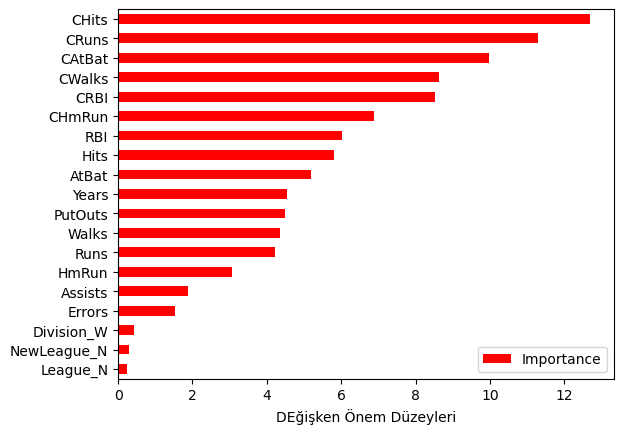

In [170]:
# degiskenlerin bagimli degiskene hatalari olan etkilerine gore  anlamliliklarini gorsellestirdik.
Importance.sort_values(by = "Importance",
                       axis = 0, 
                       ascending = True).plot(kind = "barh",color = "r")
plt.xlabel("DEğişken Önem Düzeyleri");
                                                                     

### Gradient Boosting Machines

- AdaBoost’un sınıflandırma ve regresyon problemlerine kolayca uyarlanabilen genelleştirilmiş versiyonudur.

- Artıklar üzerine tek bir tahminsel model formunda olan modeller serisi kurulur.

                                                         (2001 Friedman)

#### Adaptive Boosting
![Ada bost](https://miro.medium.com/v2/resize:fit:850/0*KYszvMnr3nCtjaGy.png)

### GBM-Model

In [174]:
from sklearn.ensemble import GradientBoostingRegressor

In [175]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)

GradientBoostingRegressor()

### GBM-Tahmin

In [177]:
gbm_model.predict(X_test)[0:5]

array([ 702.1896201 ,  834.82596335, 1264.77509649,  172.67984844,
        748.49865388])

In [178]:
y_pred = gbm_model.predict(X_test)
mse = np.sqrt(mean_squared_error(y_test, y_pred))

In [179]:
mse

353.9224989904392

### GBM-Model Tuning

- learning_rate: Öğrenme oranı, modelin her adımda ne kadar öğrenme yapacağını belirler. Düşük değerler modelin daha yavaş ama daha hassas öğrenmesini sağlar; yüksek değerler hızlı ama olası yüksek varyanslı sonuçlar verebilir.
  
- max_depth: Her bir karar ağacının maksimum derinliğini belirler. Daha derin ağaçlar daha karmaşık yapılar oluşturabilir, ancak aşırı öğrenme (overfitting) riski artar.

- n_estimators: Modelde kaç adet ağaç oluşturulacağını belirler. Daha fazla ağaç, genelde daha iyi tahmin gücü sağlar, fakat hesaplama süresi artar.

- subsample: Her ağacın eğitimi için kullanılan veri oranını belirler. Örneklem oranını düşürmek, overfitting'i azaltabilir. 1 değeri tüm veriyi kullanırken, daha düşük değerler verinin bir kısmını kullanır.

In [182]:
gbm_params = {'learning_rate': [0.001, 0.01, 0.1, 0.2],
            'max_depth': [3, 5, 8, 50, 100],
            'n_estimators': [200, 500, 1000, 2000],
             'subsample': [1, 0.5, 0.75]}

In [183]:
gbm_model = GradientBoostingRegressor(random_state=42)

In [184]:
#verbose=2: Eğitim sırasında daha detaylı bilgi verir, örneğin her katlama
#(fold) ve parametre kombinasyonu için hangi adımda olduğunu gösterir.
#Bu, özellikle GridSearchCV gibi uzun süren işlemlerde modelin hangi aşamada
#olduğunu izlemek için faydalıdır.
gbm_cv_model = GridSearchCV(gbm_model,
                            gbm_params,
                            cv=10,
                           n_jobs=-1,
                           verbose=2)
gbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [185]:
gbm_cv_model.best_params_

{'learning_rate': 0.01,
 'max_depth': 50,
 'n_estimators': 2000,
 'subsample': 0.5}

In [186]:
gbm_tuned = GradientBoostingRegressor(learning_rate=0.01,
                                      max_depth=50,
                                      n_estimators=2000,
                                      subsample=0.5)
gbm_tuned = gbm_tuned.fit(X_train, y_train)

In [187]:
y_pred = gbm_tuned.predict(X_test)
mse = np.sqrt(mean_squared_error(y_test, y_pred))

In [188]:
mse

333.33070732192806

In [189]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index=X_train.columns)

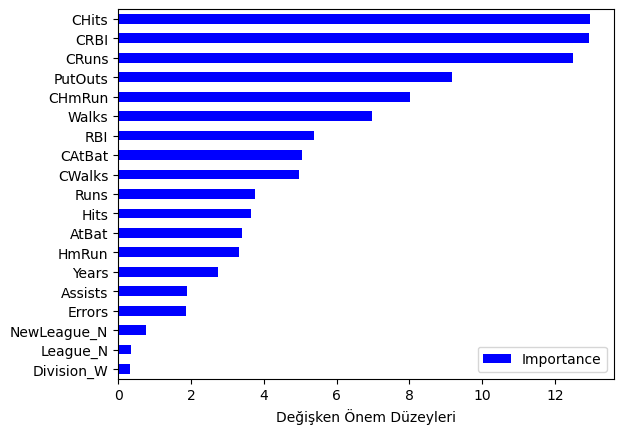

In [190]:
Importance.sort_values(by="Importance",
                      axis=0,
                      ascending=True).plot(kind="barh", color = "b")
plt.xlabel("Değişken Önem Düzeyleri");



### eXtreme Gradient Boosting (XGBoost)

- XGBoost, GBM’in hız ve tahmin performansını arttırmak üzere optimize edilmiş; ölçeklenebilir ve farklı platformlara entegre edilebilir halidir.

                                                         Tianqi Chen 2014

### XGBoost-Model

In [193]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)


In [194]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [195]:
import xgboost as xgb

In [196]:
# DMatrix  xgboostun ozel veri yapisi
DM_train = xgb.DMatrix(data = X_train, label = y_train)
DM_test = xgb.DMatrix(data= X_test, label = y_test)

In [197]:
from xgboost import XGBRegressor

In [198]:
xgb_model = XGBRegressor().fit(X_train, y_train)

### XGBoost-Tahmin

In [200]:
y_pred = xgb_model.predict(X_test)
mse = np.sqrt(mean_squared_error(y_test, y_pred))

In [201]:
mse

366.3863437634965

### XGBoost-Model tuning

In [203]:
xgb_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

- colsample_bytree: Bu parametre, her bir ağacın oluşturulmasında kullanılacak olan özelliklerin (feature) yüzdesini belirler. Eğer veri setin çok büyük ve çok sayıda özellik içeriyorsa, colsample_bytree değerini düşürerek her ağacın daha az özelliğe bakmasını sağlayabilirsin.
  
   Değer Aralığı: 0 ile 1 arasında bir değer alır. Örneğin, 0.8 değeri ağacın %80 özellik kullanacağını belirtir.
  
Neden Önemli?: Bu parametre, modelin aşırı öğrenmesini (overfitting) önlemek ve modelin daha iyi genelleme yapmasını sağlamak için önemlidir. Özellikle büyük veri setlerinde daha az özellik kullanarak hız kazanılabilir.

- booster: Bu parametre, hangi boosting algoritmasının kullanılacağını belirtir. XGBoost, üç farklı türde booster sunar:
gbtree: Karar ağaçlarına dayalı boosting yöntemi.
gblinear: Doğrusal model üzerinden yapılan boosting.
dart: Dropout ile ağaçları rastgele kaldırarak yapılan bir yöntem

- learning_rate (eta): Bu parametre, her ağacın katkısının ne kadar olacağını belirler. Düşük bir learning_rate, modelin daha yavaş öğrenmesini ve genel olarak daha doğru sonuçlar vermesini sağlayabilir, ancak daha fazla ağaç oluşturmak gerekebilir.
- max_depth: Ağacın derinliğini belirler. Daha derin ağaçlar daha karmaşık desenleri yakalayabilir, ancak overfitting riskini de artırır.
- n_estimators: Oluşturulacak ağaç sayısını belirler. Genelde büyük veri setlerinde daha fazla ağaç kullanmak model performansını artırabilir, ancak modelin hesaplama maliyetini de yükseltebilir.
- subsample: Her ağacın oluşturulmasında kullanılacak örneklerin (veri satırları) yüzdesini belirtir. Bu da overfitting'i önlemede önemli bir parametredir.


In [205]:
xgb_grid = {
    'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [2, 3, 4, 5, 6,],
    'learning_rate': [0.1, 0.01, 0.5]
}


In [206]:
xgb_model = XGBRegressor()
xgb_cv = GridSearchCV(xgb_model,
                     param_grid=xgb_grid,
                     cv = 10,
                     n_jobs = -1,
                     verbose = 2) 
xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.1, 0.01, 0.5],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 500, 1000]},
             verbose=2)

In [461]:
xgb_cv.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.5,
 'max_depth': 3,
 'n_estimators': 100}

- gelişmiş hiperparametre optimizasyonu anlamında modellerimizi daha iyi nasıl hiperparametre optimizasyonuna tabi tutarız ör burda XGB modelini ele aldığımızda  burda yaygın  görüş   şudur modelimizin  önemli olarak kullandığı parametreler  belirlenir  burda  mesela learning_rate  ve max_depth  bu önem sırası belirlendikten sonra parametrelerin ön tanımlı değerleri  sabit bırakılır öncelikle en  önemli olan parametrenin  değerleri aranır .........

In [523]:
xgb_tuned = XGBRegressor(colsample = 0.9,
                        learning_rate = 0.5,
                        max_depth = 9,
                        n_estimators = 200)
xgb_tuned = xgb_tuned.fit(X_train, y_train)

In [525]:
y_pred = xgb_tuned.predict(X_test)
mse = np.sqrt(mean_squared_error(y_test, y_pred))

In [527]:
mse

346.5174047744273

###  Light GBM
- Light GBM, XGBoost'un eğitim süresi performansını attırmaya yönelik geliştirilen bir diğer GBM türüdür.
  
                                                      Microsoft 2017  

### Light GBM-Model

In [537]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)


In [ ]:
#pip install lightgbm

In [546]:
from lightgbm import LGBMRegressor

In [548]:
lgbm = LGBMRegressor()
lgbm_model = lgbm.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 19
[LightGBM] [Info] Start training from score 543.483442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

### Light GBM-Tahmin

*num_iteration*
- Kodda lgbm_model.best_iteration_ kullanıldığı için, bu parametre en iyi performansı sağlayan iterasyonu (en iyi sayıda ağaç) temsil eder. Model eğitim sürecinde belirli bir sayıda ağaç oluşturur, ancak her iterasyonun model performansına katkısı farklı olabilir. best_iteration_, modelin en iyi performansı gösterdiği iterasyonu (veya ağaç sayısını) seçer ve tahminler sadece o iterasyona kadar yapılır.

In [555]:
y_pred = lgbm_model.predict(X_test,
                            num_iteration = lgbm_model.best_iteration_)
mse = np.sqrt(mean_squared_error(y_test, y_pred))

In [557]:
mse

363.8712087611089

### Model tuning

In [561]:
lgbm_model

LGBMRegressor()

In [569]:
lgbm_grid = {
    'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
    'learning_rate': [0.01, 0.1, 0.5, 1],
    'n_eatimators': [20, 40, 100, 200, 500, 1000], 
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8] }

lgbm = LGBMRegressor()
lgbm_cv_model = GridSearchCV(lgbm,
                             lgbm_grid,
                             cv=10,
                             n_jobs=-1,
                             verbose=2)

In [571]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 960 candidates, totalling 9600 fits
[LightGBM] [Warning] Unknown parameter: n_eatimators
[LightGBM] [Warning] Unknown parameter: n_eatimators
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000247 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 19
[LightGBM] [Info] Start training from score 543.483442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

GridSearchCV(cv=10, estimator=LGBMRegressor(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6, 0.9, 1],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
                         'n_eatimators': [20, 40, 100, 200, 500, 1000]},
             verbose=2)

In [573]:
lgbm_cv_model.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 4,
 'n_eatimators': 20}

In [616]:
lgbm_tuned = LGBMRegressor(colsample_bytree=0.5,
                          learning_rate=0.1,
                          max_depth=4,
                          n_estimators=20)
lgbm_tuned = lgbm_tuned.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 831
[LightGBM] [Info] Number of data points in the train set: 197, number of used features: 19
[LightGBM] [Info] Start training from score 543.483442
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [618]:
y_pred = lgbm_tuned.predict(X_test)
mse = np.sqrt(mean_squared_error(y_test, y_pred))

In [620]:
mse 

375.00101953487496

### Category Boosting(CatBoost)
- kategorik değişkenler ile otomatik olarak mücadele edebilen, hızlı, başarılı bir diğer GBM türevi.
  
                                                             Yandex 2017  

### CatBoost-Model

In [4]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split (X, y,
                                                     test_size=0.25,
                                                     random_state= 42)

In [633]:
#pip install catboost

  Using cached catboost-1.2.7-cp312-cp312-win_amd64.whl.metadata (1.2 kB)
  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.7 MB 325.1 kB/s eta 0:05:13
   ---------------------------------------- 0.1/101.7 MB 409.6 kB/s eta 0:04:09
   ---------------------------------------- 0.1/101.7 MB 544.7 kB/s eta 0:03:07
   ---------------------------------------- 0.1/101.7 MB 552.2 kB/s eta 0:03:04
   ---------------------------------------- 0.1/101.7 MB 500.5 kB/s eta 0:03:23
   ---------------------------------------- 0.2/101.7 MB 588.9 kB/s eta 0:02:53
   ---------------------------------------- 0.2/101.7 MB 597.3 kB/s eta 0:02:50
   ---------------------------------------- 0.2/101.7 MB 600.7 kB/s eta 0:02:49
   ---------------------------------------- 0.3/101.7 MB 654.1 kB/s eta 0:02:36

In [6]:
from catboost import CatBoostRegressor
import time

In [8]:
catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)

Learning rate set to 0.031674
0:	learn: 437.6430699	total: 155ms	remaining: 2m 34s
1:	learn: 431.3923642	total: 159ms	remaining: 1m 19s
2:	learn: 424.8820360	total: 162ms	remaining: 53.8s
3:	learn: 418.2514904	total: 165ms	remaining: 41.1s
4:	learn: 412.6394021	total: 169ms	remaining: 33.6s
5:	learn: 406.6247020	total: 172ms	remaining: 28.5s
6:	learn: 400.5321206	total: 175ms	remaining: 24.9s
7:	learn: 394.6683437	total: 179ms	remaining: 22.2s
8:	learn: 388.2496484	total: 182ms	remaining: 20.1s
9:	learn: 382.9448842	total: 186ms	remaining: 18.4s
10:	learn: 377.2600080	total: 189ms	remaining: 17s
11:	learn: 372.4829606	total: 192ms	remaining: 15.8s
12:	learn: 366.6823437	total: 198ms	remaining: 15s
13:	learn: 362.6076230	total: 200ms	remaining: 14.1s
14:	learn: 358.0107745	total: 203ms	remaining: 13.3s
15:	learn: 353.2802665	total: 205ms	remaining: 12.6s
16:	learn: 348.5646265	total: 208ms	remaining: 12s
17:	learn: 343.6407912	total: 210ms	remaining: 11.5s
18:	learn: 339.2363847	total: 

### CatBoost-Tahmin

In [10]:
y_pred = catb_model.predict(X_test)
mse = np.sqrt(mean_squared_error(y_test, y_pred))

In [12]:
mse

351.194631344607

### CatBoost-Model Tuning

In [14]:
start_time = time.time()
catb_grid ={
    'iterations': [200, 500, 1000, 2000],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'depth': [3, 4, 5, 6, 7, 8, 9] }

catb = CatBoostRegressor()
catb_cv_model = GridSearchCV(catb, 
                             catb_grid,
                             cv=5,
                             n_jobs=-1,
                             verbose=2)

In [16]:
catb_cv_model.fit(X_train, y_train)

end_time = time.time()

fit_duration = end_time - start_time
print(f"The model fit process took {fit_duration:.2f} seconds.")

Fitting 5 folds for each of 112 candidates, totalling 560 fits
0:	learn: 422.4143448	total: 1.59ms	remaining: 1.59s
1:	learn: 404.1864276	total: 3.18ms	remaining: 1.59s
2:	learn: 386.3231718	total: 4.95ms	remaining: 1.65s
3:	learn: 370.5548032	total: 6.13ms	remaining: 1.53s
4:	learn: 354.9242038	total: 7.3ms	remaining: 1.45s
5:	learn: 342.3403984	total: 8.46ms	remaining: 1.4s
6:	learn: 328.2370070	total: 9.65ms	remaining: 1.37s
7:	learn: 317.5056526	total: 10.9ms	remaining: 1.35s
8:	learn: 306.6243511	total: 12ms	remaining: 1.32s
9:	learn: 297.3147023	total: 13.1ms	remaining: 1.3s
10:	learn: 288.3685892	total: 14.3ms	remaining: 1.28s
11:	learn: 281.0996220	total: 15.3ms	remaining: 1.26s
12:	learn: 273.2254898	total: 16.4ms	remaining: 1.24s
13:	learn: 266.9003385	total: 17.5ms	remaining: 1.23s
14:	learn: 261.9092500	total: 18.4ms	remaining: 1.21s
15:	learn: 256.2637350	total: 19.3ms	remaining: 1.19s
16:	learn: 250.3667935	total: 20.3ms	remaining: 1.18s
17:	learn: 244.8631098	total: 21.3

In [18]:
catb_cv_model.best_params_

{'depth': 5, 'iterations': 1000, 'learning_rate': 0.1}

In [20]:
catb_tuned = CatBoostRegressor(iterations=1000,
                              learning_rate=0.1,
                              depth=5)
catb_tuned = catb_tuned.fit(X_train, y_train)

0:	learn: 422.4143448	total: 1.84ms	remaining: 1.84s
1:	learn: 404.1864276	total: 4.13ms	remaining: 2.06s
2:	learn: 386.3231718	total: 5.73ms	remaining: 1.9s
3:	learn: 370.5548032	total: 7.41ms	remaining: 1.84s
4:	learn: 354.9242038	total: 9.49ms	remaining: 1.89s
5:	learn: 342.3403984	total: 11.5ms	remaining: 1.9s
6:	learn: 328.2370070	total: 13.5ms	remaining: 1.91s
7:	learn: 317.5056526	total: 15.6ms	remaining: 1.94s
8:	learn: 306.6243511	total: 17.5ms	remaining: 1.93s
9:	learn: 297.3147023	total: 19.9ms	remaining: 1.97s
10:	learn: 288.3685892	total: 21.9ms	remaining: 1.97s
11:	learn: 281.0996220	total: 24.4ms	remaining: 2.01s
12:	learn: 273.2254898	total: 26.3ms	remaining: 2s
13:	learn: 266.9003385	total: 28.4ms	remaining: 2s
14:	learn: 261.9092500	total: 30.6ms	remaining: 2.01s
15:	learn: 256.2637350	total: 32.4ms	remaining: 1.99s
16:	learn: 250.3667935	total: 34.8ms	remaining: 2.01s
17:	learn: 244.8631098	total: 36.8ms	remaining: 2.01s
18:	learn: 240.1540669	total: 39.1ms	remaining

In [22]:
y_pred = catb_tuned.predict(X_test)
mse = np.sqrt(mean_squared_error(y_test, y_pred))

In [24]:
mse

356.665762904938